#Customer Churn Prediction

**Research Questions**

*  Can machine learning help banks predict which customers are likely to leave, and how accurate can these predictions be?
*  Which machine learning algorithm works best for predicting customer churn in banking data?
*  What customer characteristics and behaviours are the most important warning signs that a customer might leave the bank?



**Project Goals**

* Perform data exploration and cleaning
* Build and compare multiple machine learning models (LR, RF, XGB)
* Improve model performance using oversampling for class imbalance
* Interpret model predictions with SHAP analysis
* Identify key features driving customer churn


# Setup Libraries & Data Loading





In [8]:
# import libraries:
# 1. to handel the data:
import numpy as np
import pandas as pd
# 2. to visualize the data:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
# 3. to preprocess the data:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder, OneHotEncoder, OrdinalEncoder
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import ADASYN
from imblearn.over_sampling import BorderlineSMOTE
from collections import Counter
# 4. to build the model:
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
# 5. for classification task:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
# 6. Metrics:
from sklearn.metrics import roc_auc_score,confusion_matrix,accuracy_score, precision_score, recall_score, r2_score, f1_score , classification_report, mean_absolute_error, mean_absolute_percentage_error
# 7. Interpretibility analysis
import shap
# 8.
import time
# 9. Compute p-values for logistic regression
import statsmodels.api as sm

# Load dataset
df = pd.read_csv('dataset.csv')

KeyboardInterrupt: 

Feature detail

* Customer ID: A unique identifier for each customer
* Surname: The customer's surname or last name
* Credit Score: A numerical value representing the customer's credit score
* Geography: The country where the customer resides (France, Spain or Germany)
* Gender: The customer's gender (Male or Female)
* Age: The customer's age.
* Tenure: The number of years the customer has been with the bank
* Balance: The customer's account balance
* NumOfProducts: The number of bank products the customer uses (e.g., savings account, credit card)
* HasCrCard: Whether the customer has a credit card (1 = yes, 0 = no)
* IsActiveMember: Whether the customer is an active member (1 = yes, 0 = no)
* EstimatedSalary: The estimated salary of the customer
* Exited: Whether the customer has churned (1 = yes, 0 = no)

# Data Preprocessing

* Removed missing and duplicate entries
* Handled outliers in numerical features
* Applied one-hot encoding to categorical variables
* Scaled numerical variables for consistent model performance
* Oversampling (e.g., SMOTE) applied to balance churn vs. non-churn classes

In [ ]:
# Displays the first 5 rows of the DataFrame to preview the data structure, column, and sample values
df.head()

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,15674932,Okwudilichukwu,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0
1,1,15749177,Okwudiliolisa,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0
2,2,15694510,Hsueh,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0
3,3,15741417,Kao,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0
4,4,15766172,Chiemenam,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0


In [ ]:
# display summary of dataframe struture and data types
df.info()

In [ ]:
# generate descriptive statistics for numerical columns in df then tranposes (swap rows/columns) for better readability
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,165034.0,8.251650e+04,47641.356500,0.00,41258.25,82516.5,1.237748e+05,165033.00
CustomerId,165034.0,1.569201e+07,71397.816791,15565701.00,15633141.00,15690169.0,1.575682e+07,15815690.00
CreditScore,165034.0,6.564544e+02,80.103340,350.00,597.00,659.0,7.100000e+02,850.00
Age,165034.0,3.812589e+01,8.867205,18.00,32.00,37.0,4.200000e+01,92.00
Tenure,165034.0,5.020353e+00,2.806159,0.00,3.00,5.0,7.000000e+00,10.00
Balance,165034.0,5.547809e+04,62817.663278,0.00,0.00,0.0,1.199395e+05,250898.09
NumOfProducts,165034.0,1.554455e+00,0.547154,1.00,1.00,2.0,2.000000e+00,4.00
HasCrCard,165034.0,7.539537e-01,0.430707,0.00,1.00,1.0,1.000000e+00,1.00
IsActiveMember,165034.0,4.977702e-01,0.499997,0.00,0.00,0.0,1.000000e+00,1.00
EstimatedSalary,165034.0,1.125748e+05,50292.865585,11.58,74637.57,117948.0,1.551525e+05,199992.48


In [ ]:
# counts how many items in each unique value in the exited column
df['Exited'].value_counts()

,count
Exited,
0,130113
1,34921


Handle Missing Values & duplicate values

In [ ]:
# Check for missing values
df.isnull().sum()

,0
id,0
CustomerId,0
Surname,0
CreditScore,0
Geography,0
Gender,0
Age,0
Tenure,0
Balance,0
NumOfProducts,0


In [ ]:
# Check for duplicated values
df[df.duplicated(keep=False)]

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited


In [ ]:
df = df.drop(['id'], axis=1)  # Drop non-predictive ID column
df = df.drop(['CustomerId'], axis=1)  # Drop non-predictive CustomerId column
df = df.drop(['Surname'], axis=1)  # Drop non-predictive Surname column
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0
1,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0
2,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0
3,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0
4,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0


Handle Outliers
*   Outliers check for numeric features

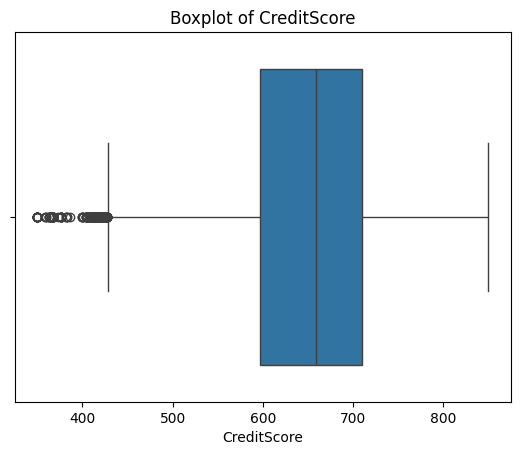

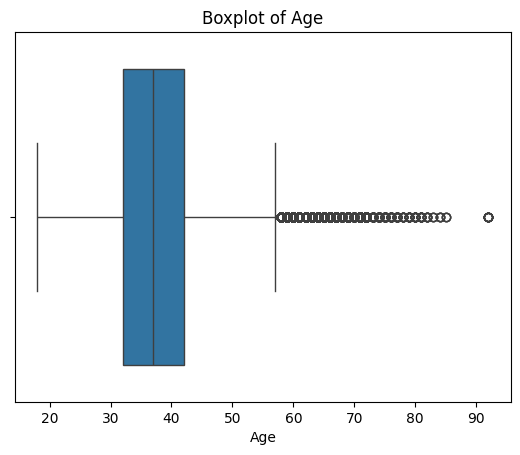

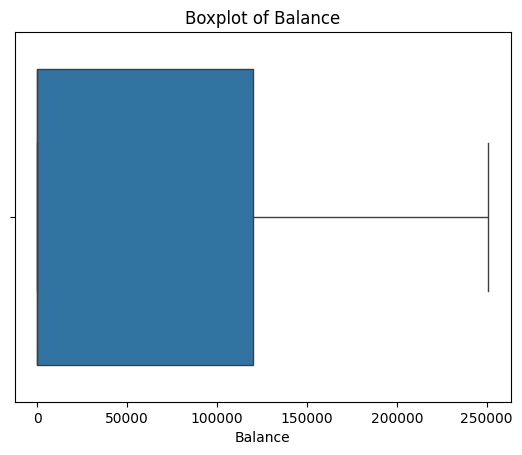

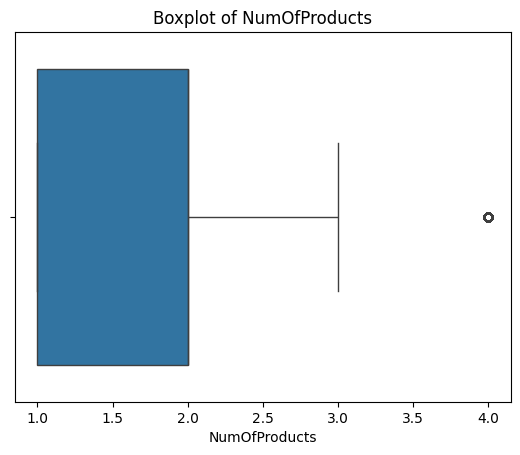

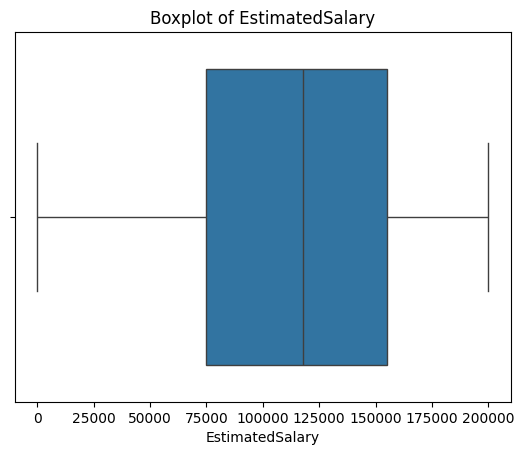

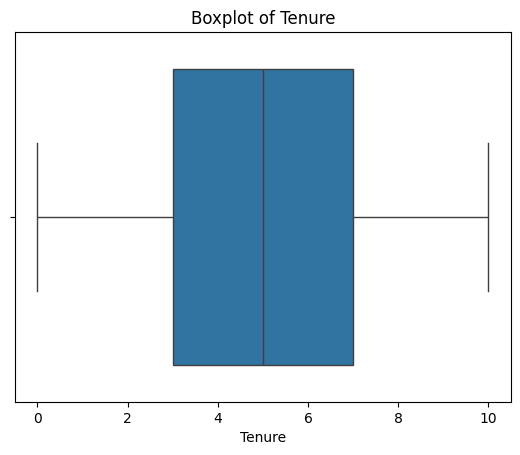

In [ ]:
# list of numerical col ti analyse for outliers/distributions
numeric_cols = ['CreditScore', 'Age', 'Balance', 'NumOfProducts', 'EstimatedSalary', 'Tenure']
# Generate boxplots for each numeric feature
for feature in numeric_cols :
  plt.figure()
  # Create boxplot using seaborn
  sns.boxplot(data=df, x=feature)  # Shows outliers beyond whiskers
  plt.title(f'Boxplot of {feature}')
  plt.show()

Feature Engineering

In [ ]:
# convert categorical variables into one-hot encoded dummy variables
# remove the first category to avoid multicollinearity
# Original categorical columns are replaced with binary columns (0/1)
df = pd.get_dummies(df, columns=['Geography', 'Gender'], drop_first=True)
df

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,668,33.0,3,0.00,2,1.0,0.0,181449.97,0,False,False,True
1,627,33.0,1,0.00,2,1.0,1.0,49503.50,0,False,False,True
2,678,40.0,10,0.00,2,1.0,0.0,184866.69,0,False,False,True
3,581,34.0,2,148882.54,1,1.0,1.0,84560.88,0,False,False,True
4,716,33.0,5,0.00,2,1.0,1.0,15068.83,0,False,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...
165029,667,33.0,2,0.00,1,1.0,1.0,131834.75,0,False,True,False
165030,792,35.0,3,0.00,1,0.0,0.0,131834.45,0,False,False,True
165031,565,31.0,5,0.00,1,1.0,1.0,127429.56,0,False,False,True
165032,554,30.0,7,161533.00,1,0.0,1.0,71173.03,0,False,True,False


Train-Test Split

In [ ]:
# separate features x and target y
X = df.drop('Exited', axis=1) # all col except Exited as features
y = df['Exited'] # Target variable (binary classification: 0/1)
# Split into training (80%) and test sets (20%) with stratification and ensures reproducibility of the split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
#stratify=y keeps the same proportion of classes in both train and test sets.

In [ ]:
X

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
0,668,33.0,3,0.00,2,1.0,0.0,181449.97,False,False,True
1,627,33.0,1,0.00,2,1.0,1.0,49503.50,False,False,True
2,678,40.0,10,0.00,2,1.0,0.0,184866.69,False,False,True
3,581,34.0,2,148882.54,1,1.0,1.0,84560.88,False,False,True
4,716,33.0,5,0.00,2,1.0,1.0,15068.83,False,True,True
...,...,...,...,...,...,...,...,...,...,...,...
165029,667,33.0,2,0.00,1,1.0,1.0,131834.75,False,True,False
165030,792,35.0,3,0.00,1,0.0,0.0,131834.45,False,False,True
165031,565,31.0,5,0.00,1,1.0,1.0,127429.56,False,False,True
165032,554,30.0,7,161533.00,1,0.0,1.0,71173.03,False,True,False


**Scaling Of Numeric Features**

In [ ]:
# Make copies to preserve original structure
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()
# List of numerical columns to scaled columns
numerical_cols = ['CreditScore', 'Age', 'Tenure', 'Balance', 'EstimatedSalary', 'NumOfProducts']
# Apply MinMaxScaler scaling
scaler = MinMaxScaler()
X_train_scaled[numerical_cols] = scaler.fit_transform(X_train[numerical_cols])
X_test_scaled[numerical_cols] = scaler.transform(X_test[numerical_cols])

In [ ]:
X_train_scaled

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
112149,0.752,0.229730,0.1,0.000000,0.333333,1.0,1.0,0.707344,False,False,False
70095,0.262,0.256757,0.8,0.607034,0.333333,1.0,0.0,0.875437,False,False,False
29247,0.466,0.229730,0.5,0.000000,0.000000,0.0,0.0,0.512897,False,False,False
161355,0.588,0.189189,0.7,0.000000,0.333333,1.0,0.0,0.389808,False,False,False
105992,0.718,0.148649,0.5,0.512353,0.000000,1.0,1.0,0.704717,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...
123771,0.804,0.459459,0.2,0.524893,0.000000,1.0,0.0,0.799623,True,False,False
22900,0.238,0.081081,0.6,0.318289,0.000000,1.0,1.0,0.658686,False,True,True
40851,0.352,0.459459,0.1,0.000000,0.333333,0.0,0.0,0.556709,False,False,False
52537,0.666,0.216216,0.9,0.000000,0.000000,1.0,0.0,0.193417,False,False,True


# Model Training & Hyperparameter Tuning

In [1]:
#Evaluation function
def evaluate_model(name, model, X_test, y_test):
    """
    Comprehensive evaluation of a classification model's performance.

    Parameters:
    - name (str): Model name for display
    - model: Trained classifier
    - X_test: Test features
    - y_test: True labels for test set

    Returns:
    - Dictionary containing all metrics (useful for comparisons)
    """
    # Generate predictions
    y_pred = model.predict(X_test)

    # Get predicted probabilities for the positive class (class=1)
    y_proba = model.predict_proba(X_test)[:, 1]
    print(f"Model: {name}")

    # Display confusion matrix (shows TP, FP, FN, TN counts)
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))

    # Print key performance metrics:
    print(f"Accuracy:  {accuracy_score(y_test, y_pred):.3f}")
    print(f"Precision: {precision_score(y_test, y_pred):.3f}")
    print(f"Recall:    {recall_score(y_test, y_pred):.3f}")
    print(f"F1-Score:  {f1_score(y_test, y_pred):.3f}")
    print(f"AUC-ROC:   {roc_auc_score(y_test, y_proba):.3f}")

    # Print comprehensive classification report
    print("Classification Report:")
    print(classification_report(y_test, y_pred))

## Logistic Regression

In [2]:
# Initialize Logistic Regression model with liblinear solver (supports both L1 and L2 regularisation)
lr = LogisticRegression(solver='liblinear', random_state=42)

# Define hyperparameter grid for tuning:
# C: Inverse of regularisation strength (smaller values = stronger regularisation)
# penalty: Type of regularisation (L1 = lasso, L2 = ridge)
lr_params = {
    'C': [0.01, 0.1, 1, 10],  # regularisation strength
    'penalty': ['l1', 'l2']
}

# Set number of folds for cross-validation
num_cv=5

NameError: name 'LogisticRegression' is not defined

In [3]:
# Experiment 1:Baseline (No Resampling)
start_time = time.time()
# GridSearchCV performs comprehensive search over specified parameter values
# Using ROC-AUC as scoring metric (appropriate for imbalanced data)
lr_grid_base = GridSearchCV(lr, lr_params, cv=num_cv, n_jobs=-1,scoring='roc_auc')
lr_grid_base.fit(X_train_scaled, y_train)
base_time = time.time() - start_time
# Evaluate model performance on test set
evaluate_model("Baseline", lr_grid_base.best_estimator_, X_test_scaled, y_test)
print(f"Baseline computation time: {base_time:.2f} seconds\n")
print("Optimal Parameters Found:", lr_grid_base.best_params_)


# Experiment 2:Random Oversampling
# RandomOverSampler duplicates random examples from minority class
ros = RandomOverSampler(random_state=42) #'auto': equivalent to 'not majority'
X_ros, y_ros = ros.fit_resample(X_train_scaled, y_train)
start_time = time.time()
lr_grid_ros = GridSearchCV(lr, lr_params, cv=num_cv, n_jobs=-1,scoring='roc_auc')
lr_grid_ros.fit(X_ros, y_ros)
ros_time = time.time() - start_time
evaluate_model("Random Oversampling", lr_grid_ros.best_estimator_, X_test_scaled, y_test)
print(f"Random Oversampling computation time: {ros_time:.2f} seconds\n")
print("Optimal Parameters Found:", lr_grid_ros.best_params_)



# Experiment 3: SMOTE (Synthetic Minority Over-sampling Technique)
# SMOTE creates synthetic samples in feature space between existing minority examples
smote = SMOTE(random_state=42) #'auto': equivalent to 'not majority'
X_smote, y_smote = smote.fit_resample(X_train_scaled, y_train)
start_time = time.time()
lr_grid_smote = GridSearchCV(lr, lr_params, cv=num_cv, n_jobs=-1,scoring='roc_auc')
lr_grid_smote.fit(X_smote, y_smote)
smote_time = time.time() - start_time
evaluate_model("SMOTE", lr_grid_smote.best_estimator_, X_test_scaled, y_test)
print(f"SMOTE computation time: {smote_time:.2f} seconds\n")
print("Optimal Parameters Found:", lr_grid_smote.best_params_)



# Experiment 4: BorderlineSMOTE
# BorderlineSMOTE focuses on samples near decision boundary
bdlSmote = BorderlineSMOTE(random_state=42) #'auto': equivalent to 'not majority'
X_bdlsmote, y_bdlsmote = bdlSmote.fit_resample(X_train_scaled, y_train)
start_time = time.time()
lr_grid_bdlsmote = GridSearchCV(lr, lr_params, cv=num_cv, n_jobs=-1,scoring='roc_auc')
lr_grid_bdlsmote.fit(X_bdlsmote, y_bdlsmote)
bdlsmote_time = time.time() - start_time
evaluate_model("BorderlineSMOTE", lr_grid_bdlsmote.best_estimator_, X_test_scaled, y_test)
print(f"BorderlineSMOTE computation time: {bdlsmote_time:.2f} seconds\n")
print("Optimal Parameters Found:", lr_grid_bdlsmote.best_params_)


# Experiment 5: ADASYN (Adaptive Synthetic Sampling)
# ADASYN generates more samples in regions of feature space with harder-to-learn examples
ada = ADASYN(random_state=42) #'auto': equivalent to 'not majority'
X_ada, y_ada = ada.fit_resample(X_train_scaled, y_train)
start_time = time.time()
lr_grid_ada = GridSearchCV(lr, lr_params, cv=num_cv, n_jobs=-1,scoring='roc_auc')
lr_grid_ada.fit(X_ada, y_ada)
ada_time = time.time() - start_time
evaluate_model("ADASYN", lr_grid_ada.best_estimator_, X_test_scaled, y_test)
print(f"ADASYN computation time: {ada_time:.2f} seconds\n")
print("Optimal Parameters Found:", lr_grid_ada.best_params_)


NameError: name 'time' is not defined

**RocCurveDisplay Plot**

In [ ]:
from sklearn.metrics import RocCurveDisplay

# Plot the ROC Curve
fig, ax = plt.subplots(figsize=(8, 6))

# Plot the ROC curve for your model
RocCurveDisplay.from_estimator(lr_grid_ros, X_test_scaled, y_test, ax=ax, color='blue', linewidth=2)

# Plot the random classifier line (AUC=0.5)
ax.plot([0, 1], [0, 1], linestyle='--', color='red', linewidth=2, label='Random Classifier (AUC = 0.5)')

# Customize the plot for your thesis
ax.set_xlabel('False Positive Rate', fontsize=12)
ax.set_ylabel('True Positive Rate (Recall)', fontsize=12)
ax.set_title('Receiver Operating Characteristic (ROC) Curve', fontsize=14)
ax.legend(loc='lower right', fontsize=12)
ax.grid(True, alpha=0.3) # Adds a light grid for readability

# Set the aspect to be equal and limits
ax.set_aspect('equal')
ax.set_xlim([-0.01, 1.01])
ax.set_ylim([-0.01, 1.01])
# Save the figure in high resolution for your thesis
plt.savefig('roc_curve.png', dpi=600, bbox_inches='tight')
plt.show()

**Logistic Regression equation string from a fitted model**

In [ ]:
def get_logit_equation(model, feature_names):
    """
    Generates the logistic regression equation string from a fitted model.

    Args:
        model: Fitted GridSearchCV object containing logistic regression model
        feature_names: List of feature names corresponding to coefficients

    Returns:
        str: Formatted logistic regression equation showing the log-odds relationship
    """

    # Extract coefficients from the best estimator found by GridSearchCV
    # [0] is used because coef_ returns 2D array (even for binary classification)
    coefs = model.best_estimator_.coef_[0]

    # Extract intercept term (also returns array, so we take [0])
    intercept = model.best_estimator_.intercept_[0]

    # Start building equation string with intercept
    equation = f"logit(p) = {intercept:.4f}"

    # Add each feature's coefficient to the equation string
    for name, coef in zip(feature_names, coefs):
        equation += f" + ({coef:.4f} * {name})"

    return equation

# Get feature names (assuming same features for all models)
feature_names = X_train.columns

# Dictionary mapping model names to their GridSearchCV objects
models = {
    'Base': lr_grid_base,
    'Random Oversampling': lr_grid_ros,
    'SMOTE': lr_grid_smote,
    'BorderlineSMOTE': lr_grid_bdlsmote,
    'ADASYN': lr_grid_ada
}

# Print equation for each model
for name, model in models.items():
    print(f"\n{name} Model Equation:")
    print(get_logit_equation(model, feature_names))
    print("-" * 50) # Separator line for readability

**Coefficient Comparison Table**

In [ ]:
def get_coefficient_df(model, feature_names, model_name):
    """Generate sorted coefficient DataFrame for a logistic regression model"""
    coefficients = model.best_estimator_.coef_[0]

    coef_df = pd.DataFrame({
        'Feature': feature_names,
        'Coefficient': coefficients,
        'Model': model_name  # Track which model the coefficients belong to
    })

    coef_df['Abs(Coefficient)'] = coef_df['Coefficient'].abs()
    coef_df.sort_values(by='Abs(Coefficient)', ascending=False, inplace=True)
    return coef_df

# Get feature names (assuming same features for all models)
feature_names = X_train_scaled.columns

# Generate coefficient tables for all models
models = {
    'Base': lr_grid_base,
    'Random Oversampling': lr_grid_ros,
    'SMOTE': lr_grid_smote,
    'BorderlineSMOTE': lr_grid_bdlsmote,
    'ADASYN': lr_grid_ada
}

# Combine all coefficients into one DataFrame for comparison
all_coefs = pd.concat([
    get_coefficient_df(model, feature_names, name)
    for name, model in models.items()
])

# Pivot for easy side-by-side comparison
coef_comparison = all_coefs.pivot_table(
    index='Feature',
    columns='Model',
    values='Coefficient',
    aggfunc='first'  # Takes the first value (should be unique for Feature+Model)
)

# Add absolute value sorting (by Base model as reference)
coef_comparison['Abs_Base'] = coef_comparison['Base'].abs()
coef_comparison.sort_values(by='Abs_Base', ascending=False, inplace=True)
coef_comparison.drop('Abs_Base', axis=1, inplace=True)

print("Side-by-Side Coefficient Comparison:")
display(coef_comparison)



**P-values**

A low p-value (≤0.05) suggests a significant relationship between the predictor and outcome, while a high p-value (>0.05) indicates insufficient evidence to support such a relationship.

In [4]:
def get_coefs_and_pvalues(best_estimator, X, y, feature_names=None):
    """
    Returns a DataFrame with coefficients, p-values, and significance flags.

    Args:
        best_estimator: Fitted `LogisticRegression` model from `best_estimator_`.
        X: Feature matrix (scaled/normalized).
        y: Target variable.
        feature_names: List of feature names (optional).

    Returns:
        DataFrame with columns: ['Feature', 'Coefficient', 'P-value', 'Significant'].
    """

      # Convert boolean columns to int (0/1)
    X = X.astype(np.float64)  # Converts bool -> int automatically


    # Add intercept (statsmodels requires explicit intercept)
    X_with_intercept =  sm.add_constant(X, has_constant='add')

    # Fit statsmodels Logit model for p-values
    logit_model = sm.Logit(y, X_with_intercept)
    result = logit_model.fit(disp=0)  # disp=0 suppresses output

    # Get coefficients and p-values
    coefs = best_estimator.coef_[0]
    intercept = best_estimator.intercept_[0]
    p_values = result.pvalues[1:]  # Exclude intercept

    # Combine coefficients and p-values
    if feature_names is None:
        feature_names = [f"Feature_{i}" for i in range(len(coefs))]

    df = pd.DataFrame({
        'Feature': feature_names,
        'Coefficient': coefs,
        'P-value': p_values,
        'Significant': p_values < 0.05  # True if p < 0.05
    })

    return df

# Baseline
print("="*50)
print("Baseline Model (No Resampling)")
print("="*50)
coef_p_df_base = get_coefs_and_pvalues(
    lr_grid_base.best_estimator_,
    X_train_scaled,
    y_train,
    feature_names=X_train.columns  # Pass feature names if available
)
print(coef_p_df_base)

# ROS
print("\n" + "="*50)
print("Random Oversampling (ROS)")
print("="*50)
coef_p_df_ros = get_coefs_and_pvalues(
    lr_grid_ros.best_estimator_,
    X_ros,
    y_ros,
    feature_names=X_train.columns
)
print(coef_p_df_ros)

# SMOTE
print("\n" + "="*50)
print("SMOTE")
print("="*50)
coef_p_df_smote = get_coefs_and_pvalues(
    lr_grid_smote.best_estimator_,
    X_smote,
    y_smote,
    feature_names=X_train.columns
)
print(coef_p_df_smote)


# BorderlineSMOTE
print("\n" + "="*50)
print("BorderlineSMOTE")
print("="*50)
coef_p_df_bdl = get_coefs_and_pvalues(
    lr_grid_bdlsmote.best_estimator_,
    X_bdlsmote,
    y_bdlsmote,
    feature_names=X_train.columns
)
print(coef_p_df_bdl)


# ADASYN
print("\n" + "="*50)
print("ADASYN")
print("="*50)
coef_p_df_ada = get_coefs_and_pvalues(
    lr_grid_ada.best_estimator_,
    X_ada,
    y_ada,
    feature_names=X_train.columns
)
print(coef_p_df_ada)


Baseline Model (No Resampling)


NameError: name 'lr_grid_base' is not defined

**SHAP VALUES**

Key Interpretation Notes:
 1. Features are ordered by importance (most impactful at top)
 2. Each point represents a test observation
 3. Color shows feature value (red=high, blue=low)
 4. X-axis shows SHAP value (impact on model output)
 5. Compare across models to see how resampling affects feature importance

In [ ]:
# Convert boolean columns to float type (required for SHAP compatibility)
# SHAP requires numerical input
bool_cols = ['Geography_Germany'	,'Geography_Spain'	,'Gender_Male']
X_train_scaled[bool_cols] = X_train_scaled[bool_cols].astype(float)
X_test_scaled[bool_cols] = X_test_scaled[bool_cols].astype(float)

# SHAP Analysis for Baseline (No Resampling) Model
# Initialize SHAP explainer with the best model from grid search
explainer = shap.Explainer(lr_grid_base.best_estimator_, X_train_scaled)
# Calculate SHAP values for test set (measures feature importance)
shap_values = explainer(X_test_scaled)
# Generate beeswarm plot (shows feature impacts and value distributions)
shap.plots.beeswarm(shap_values)
# Beeswarm plots show:
# - Feature importance (by absolute SHAP value)
# - Impact direction (positive/negative on prediction)
# - Original feature values (color coded)

# SHAP Analysis for Random Oversampling Model
explainer = shap.Explainer(lr_grid_ros.best_estimator_, X_train_scaled)
shap_values = explainer(X_test_scaled)
shap.plots.beeswarm(shap_values)

# SHAP Analysis for SMOTE Model
explainer = shap.Explainer(lr_grid_smote.best_estimator_, X_train_scaled)
shap_values = explainer(X_test_scaled)
shap.plots.beeswarm(shap_values)

# SHAP Analysis for BorderlineSMOTE Model
explainer = shap.Explainer(lr_grid_bdlsmote.best_estimator_, X_train_scaled)
shap_values = explainer(X_test_scaled)
shap.plots.beeswarm(shap_values)

# SHAP Analysis for ADASYN Model
explainer = shap.Explainer(lr_grid_ada.best_estimator_, X_train_scaled)
shap_values = explainer(X_test_scaled)
shap.plots.beeswarm(shap_values)

## Random Forest

In [ ]:
def getShapValues():

  """
    Performs SHAP analysis on Random Forest models trained with different resampling techniques.
    Generates beeswarm and bar plots to visualize feature importance and impacts.

    Steps:
    1. Takes a representative sample of test data
    2. Computes SHAP values for each model variant
    3. Visualises results for the positive class (class 1)

    Note: Uses TreeExplainer optimised for tree-based models like Random Forest
  """

  # Take a random sample of 1000 instances from the scaled test set for SHAP analysis
  # Using a sample improves computation speed while maintaining representativeness
  X_sample = X_test_scaled.sample(1000, random_state=42)

  # 1: SHAP Values for Baseline (no resampling)
  model = rf_grid_base.best_estimator_ # Get best performing model from grid search
  # Initialise TreeExplainer for Random Forest (optimized for tree-based models)
  explainer = shap.TreeExplainer(model)
  # Calculate SHAP values (returns Explanation object with all classes)
  shap_values_new = explainer(X_sample)
  # Generate beeswarm plot for class 1 (positive class in binary classification)
  # Shows feature impacts on the positive class prediction
  shap.plots.beeswarm(shap_values_new[:,:,1])  # Plot for class 1 (binary)
  # Feature importance
  shap.plots.bar(shap_values_new[:,:,1])

  # 2: SHAP Values for Random Oversampling
  model = rf_grid_ros.best_estimator_
  # Compute SHAP values
  explainer = shap.TreeExplainer(model)
  shap_values_new = explainer(X_sample)
  shap.plots.beeswarm(shap_values_new[:,:,1]) # Plot for class 1 (binary)
  # Feature importance
  shap.plots.bar(shap_values_new[:,:,1])

  # 3: SHAP Values for SMOTE
  model = rf_grid_smote.best_estimator_
  explainer = shap.TreeExplainer(model)
  shap_values_new = explainer(X_sample)
  shap.plots.beeswarm(shap_values_new[:,:,1]) # Plot for class 1 (binary)
  # Feature importance
  shap.plots.bar(shap_values_new[:,:,1])

  # 4: SHAP Values for BorderlineSMOTE
  model = rf_grid_bdlsmote.best_estimator_
  # Compute SHAP values
  explainer = shap.TreeExplainer(model)
  shap_values_new = explainer(X_sample)
  shap.plots.beeswarm(shap_values_new[:,:,1]) # Plot for class 1 (binary)
  # Feature importance
  shap.plots.bar(shap_values_new[:,:,1])

  # 5: SHAP Values for ADASYN
  model = rf_grid_adasyn.best_estimator_
  explainer = shap.TreeExplainer(model)
  shap_values_new = explainer(X_sample)
  shap.plots.beeswarm(shap_values_new[:,:,1]) # Plot for class 1 (binary)
  # Feature importance
  shap.plots.bar(shap_values_new[:,:,1])

In [5]:
# Initialise Random Forest classifier with fixed random state for reproducibility
rf = RandomForestClassifier(random_state=42)

# Define hyperparameter grid for tuning:
# n_estimators: Number of trees in the forest
# max_depth: Maximum depth of each tree (None = nodes expanded until pure)
# min_samples_split: Minimum samples required to split an internal node
# max_features: Number of features to consider for best split ('sqrt' = square root of total features)
rf_params = {
    'n_estimators': [100,200,500],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5,10],
    'max_features': ['sqrt']
}

# Set number of folds for cross-validation
num_cv=5

NameError: name 'RandomForestClassifier' is not defined

In [6]:
# Experiment 1: Baseline (no resampling)
start_time = time.time()
# GridSearchCV performs comprehensive search over specified parameter values
# Using ROC-AUC as scoring metric (appropriate for imbalanced data)
rf_grid_base = GridSearchCV(rf, rf_params, cv=num_cv, n_jobs=-1,scoring='roc_auc')
rf_grid_base.fit(X_train_scaled, y_train)
base_time = time.time() - start_time
# Evaluate model performance on test set
evaluate_model("Baseline", rf_grid_base.best_estimator_, X_test_scaled, y_test)
print(f"Baseline computation time: {base_time:.2f} seconds\n")
print("Optimal Parameters Found:", rf_grid_base.best_params_)


# Experiment 2: Random Oversampling
# RandomOverSampler duplicates random examples from minority class
ros = RandomOverSampler(random_state=42) #'auto': equivalent to 'not majority'
X_ros, y_ros = ros.fit_resample(X_train_scaled, y_train)
start_time = time.time()
rf_grid_ros = GridSearchCV(rf, rf_params, cv=num_cv, n_jobs=-1,scoring='roc_auc')
rf_grid_ros.fit(X_ros, y_ros)
ros_time = time.time() - start_time
evaluate_model("Random Oversampling", rf_grid_ros.best_estimator_, X_test_scaled, y_test)
print(f"Random Oversampling computation time: {ros_time:.2f} seconds\n")
print("Optimal Parameters Found:", rf_grid_ros.best_params_)

# Experiment 3: SMOTE (Synthetic Minority Over-sampling Technique)
# SMOTE creates synthetic samples in feature space between existing minority examples
smote = SMOTE(random_state=42) #'auto': equivalent to 'not majority'
X_smote, y_smote = smote.fit_resample(X_train_scaled, y_train)
start_time = time.time()
rf_grid_smote = GridSearchCV(rf, rf_params, cv=num_cv, n_jobs=-1,scoring='roc_auc')
rf_grid_smote.fit(X_smote, y_smote)
smote_time = time.time() - start_time
evaluate_model("SMOTE", rf_grid_smote.best_estimator_, X_test_scaled, y_test)
print(f"SMOTE computation time: {smote_time:.2f} seconds\n")
print("Optimal Parameters Found:", rf_grid_smote.best_params_)


# Experiment 4: BorderlineSMOTE
# BorderlineSMOTE focuses on samples near decision boundary
bdlSmote = BorderlineSMOTE(random_state=42) #'auto': equivalent to 'not majority'
X_bdlsmote, y_bdlsmote = bdlSmote.fit_resample(X_train_scaled, y_train)
start_time = time.time()
rf_grid_bdlsmote = GridSearchCV(rf, rf_params, cv=num_cv, n_jobs=-1,scoring='roc_auc')
rf_grid_bdlsmote.fit(X_bdlsmote, y_bdlsmote)
bdlsmote_time = time.time() - start_time
evaluate_model("BorderlineSMOTE", rf_grid_bdlsmote.best_estimator_, X_test_scaled, y_test)
print(f"BorderlineSMOTE computation time: {bdlsmote_time:.2f} seconds\n")
print("Optimal Parameters Found:", rf_grid_bdlsmote.best_params_)


# Experiment 5: ADASYN (Adaptive Synthetic Sampling)
# ADASYN generates more samples in regions of feature space with harder-to-learn examples
adasyn = ADASYN(random_state=42) #'auto': equivalent to 'not majority'
X_adasyn, y_adasyn = adasyn.fit_resample(X_train_scaled, y_train)
start_time = time.time()
rf_grid_adasyn = GridSearchCV(rf, rf_params, cv=num_cv, n_jobs=-1,scoring='roc_auc')
rf_grid_adasyn.fit(X_adasyn, y_adasyn)
ada_time = time.time() - start_time
evaluate_model("ADASYN", rf_grid_adasyn.best_estimator_, X_test_scaled, y_test)
print(f"ADASYN computation time: {ada_time:.2f} seconds\n")
print("Optimal Parameters Found:", rf_grid_adasyn.best_params_)

getShapValues()


NameError: name 'time' is not defined

**Permutation Importance**
- To evaluate the true predictive contribution of each feature
- It identifies which features are most important for the model's predictions

In [7]:
from sklearn.inspection import permutation_importance

def plot_permutation_importance(model, X, y, feature_names, title):

    # Calculate permutation importance
    # model.best_estimator_ accesses the best performing model from a tuning process
    # n_repeats=10: Each feature is shuffled 10 times for more reliable estimates
    # random_state=42: Ensures reproducible results across runs
    # scoring='roc_auc': Uses AUC as the evaluation metric (common for classification)
    result = permutation_importance(
        model.best_estimator_, X, y,
        n_repeats=10,
        random_state=42,
        scoring='roc_auc'
    )

    # Create a DataFrame to store and organize the results
    # feature_names: List of feature names
    # result.importances_mean: The average decrease in model performance when each feature is shuffled
    # sort_values(): Orders features from most to least important
    perm_df = pd.DataFrame({
        'Feature': feature_names,
        'Importance': result.importances_mean
    }).sort_values('Importance', ascending=False)

    # Create the visualization
    plt.figure(figsize=(10, 6))
    # Generate horizontal bar plot using seaborn
    # x='Importance': Values determine bar lengths
    # y='Feature': Lists features on the y-axis
    sns.barplot(x='Importance', y='Feature', data=perm_df)
    plt.title(f'Permutation Importance: {title}')
    plt.tight_layout() # Adjust layout to prevent label clipping
    plt.show()
    return perm_df


# After each experiment:
feature_names = X_train_scaled.columns

# 1. Baseline
base_imp = plot_permutation_importance(rf_grid_base,X_train_scaled,y_train, feature_names, "Baseline")

# 2. Random Oversampling
ros_imp = plot_permutation_importance(rf_grid_ros,X_ros,y_ros, feature_names, "Random Oversampling")

# 3. SMOTE
smote_imp = plot_permutation_importance(rf_grid_smote,X_smote,y_smote, feature_names, "SMOTE")

# 4. BorderlineSMOTE
bdlsmote_imp = plot_permutation_importance(rf_grid_bdlsmote,X_bdlsmote,y_bdlsmote, feature_names, "BorderlineSMOTE")

# 5. ADASYN
ada_imp = plot_permutation_importance(rf_grid_adasyn,X_adasyn,y_adasyn, feature_names, "ADASYN")

NameError: name 'X_train_scaled' is not defined

## XGBoost

In [ ]:
# Initialise XGBoost classifier with fixed random state for reproducibility
# use_label_encoder=False avoids warning about future deprecation
xgb = XGBClassifier(random_state=42,use_label_encoder=False,objective="binary:logistic", eval_metric='logloss')

# Define hyperparameter grid for tuning:
xgb_params = {
    # Number of gradient boosted trees (boosting rounds)
    'n_estimators': [100, 200],  # Number of trees (K)

    # Maximum tree depth (controls model complexity)
    'max_depth': [3, 6],  # Shallower trees prevent overfitting, Limits maximum tree depth, controlling T

    # Step size shrinkage (eta) for weighting new trees
    'learning_rate': [0.05, 0.1, 0.3],  # Also called eta

    # L1 regularization term (LASSO regression)
    'reg_alpha': [0, 0.1, 0.5, 1],  # Also called alpha
    # L2 regularization term (Ridge regression)
    'reg_lambda': [0.1, 0.5, 1, 5, 10]  # L2 regularization (λ)
}

# Set number of folds for cross-validation
num_cv=5

In [ ]:
# Experiment 1:Baseline (no resampling)
start_time = time.time()
# GridSearchCV performs comprehensive search over specified parameter values
# Using ROC-AUC as scoring metric (appropriate for imbalanced data)
xgb_grid_base = GridSearchCV(xgb, xgb_params, cv=num_cv, n_jobs=-1,scoring='roc_auc')
xgb_grid_base.fit(X_train_scaled, y_train)
base_time = time.time() - start_time
evaluate_model("XGBoost - Baseline", xgb_grid_base.best_estimator_, X_test_scaled, y_test)
print(f"Baseline computation time: {base_time:.2f} seconds\n")
print("Optimal Parameters Found:", xgb_grid_base.best_params_)


# Experiment 2:Random Oversampling
ros = RandomOverSampler(random_state=42)
X_ros, y_ros = ros.fit_resample(X_train_scaled, y_train)
start_time = time.time()
xgb_grid_ros = GridSearchCV(xgb, xgb_params, cv=num_cv, n_jobs=-1,scoring='roc_auc')
xgb_grid_ros.fit(X_ros, y_ros)
ros_time = time.time() - start_time
evaluate_model("XGBoost - Random Oversampling", xgb_grid_ros.best_estimator_, X_test_scaled, y_test)
print(f"Random Oversampling computation time: {ros_time:.2f} seconds\n")
print("Optimal Parameters Found:", xgb_grid_ros.best_params_)


# Experiment 3:SMOTE
smote = SMOTE(random_state=42)
X_smote, y_smote = smote.fit_resample(X_train_scaled, y_train)
start_time = time.time()
xgb_grid_smote = GridSearchCV(xgb, xgb_params, cv=num_cv, n_jobs=-1,scoring='roc_auc')
xgb_grid_smote.fit(X_smote, y_smote)
smote_time = time.time() - start_time
evaluate_model("XGBoost - SMOTE", xgb_grid_smote.best_estimator_, X_test_scaled, y_test)
print(f"SMOTE computation time: {smote_time:.2f} seconds\n")
print("Optimal Parameters Found:", xgb_grid_smote.best_params_)




# Experiment 4:BorderlineSMOTE
bdlSmote = BorderlineSMOTE(random_state=42) #'auto': equivalent to 'not majority'
X_bdlsmote, y_bdlsmote = bdlSmote.fit_resample(X_train_scaled, y_train)
start_time = time.time()
xgb_grid_bdlsmote = GridSearchCV(xgb, xgb_params, cv=num_cv, n_jobs=-1,scoring='roc_auc')
xgb_grid_bdlsmote.fit(X_bdlsmote, y_bdlsmote)
bdlsmote_time = time.time() - start_time
evaluate_model("BorderlineSMOTE", xgb_grid_bdlsmote.best_estimator_, X_test_scaled, y_test)
print(f"BorderlineSMOTE computation time: {bdlsmote_time:.2f} seconds\n")
print("Optimal Parameters Found:", xgb_grid_bdlsmote.best_params_)



# Experiment 5:ADASYN
ada = ADASYN(random_state=42) #'auto': equivalent to 'not majority'
X_ada, y_ada = ada.fit_resample(X_train_scaled, y_train)
start_time = time.time()
xgb_grid_ada = GridSearchCV(xgb, xgb_params, cv=num_cv, n_jobs=-1,scoring='roc_auc')
xgb_grid_ada.fit(X_ada, y_ada)
ada_time = time.time() - start_time
evaluate_model("ADASYN", xgb_grid_ada.best_estimator_, X_test_scaled, y_test)
print(f"ADASYN computation time: {ada_time:.2f} seconds\n")
print("Optimal Parameters Found:", xgb_grid_ada.best_params_)


SHAP VALUES

In [ ]:
# Take a random sample of 1000 instances from the scaled test set for SHAP analysis
# Using a sample improves computation speed while maintaining representativeness
# random_state=42 ensures reproducibility of the sample
X_sample = X_test_scaled.sample(1000, random_state=42)

# 1: SHAP Values for Baseline (no resampling)
model = xgb_grid_base.best_estimator_
explainer = shap.TreeExplainer(model)
shap_values = explainer(X_sample)
# Plot for class 1 (binary)
shap.summary_plot(shap_values, X_sample)
shap.plots.bar(shap_values)

# 2: SHAP Values for Random Oversampling
model = xgb_grid_ros.best_estimator_
explainer = shap.TreeExplainer(model)
shap_values = explainer(X_sample)
# Plot for class 1 (binary)
shap.summary_plot(shap_values, X_sample)
shap.plots.bar(shap_values)

# 3: SHAP Values for SMOTE
model = xgb_grid_smote.best_estimator_
explainer = shap.TreeExplainer(model)
shap_values = explainer(X_sample)
# Plot for class 1 (binary)
shap.summary_plot(shap_values, X_sample)
shap.plots.bar(shap_values)

# 4: SHAP Values for BorderlineSMOTE
model = xgb_grid_bdlsmote.best_estimator_
explainer = shap.TreeExplainer(model)
shap_values = explainer(X_sample)
# Plot for class 1 (binary)
shap.summary_plot(shap_values, X_sample)
shap.plots.bar(shap_values)

# 5: SHAP Values for ADASYN
model = xgb_grid_ada.best_estimator_
explainer = shap.TreeExplainer(model)
shap_values = explainer(X_sample)
# Plot for class 1 (binary)
shap.summary_plot(shap_values, X_sample)
shap.plots.bar(shap_values)

**Feature Importance**

In [ ]:
def plot_feature_importance(model, feature_names, title):
    """Plot feature importance for XGBoost model."""
    plt.figure(figsize=(10, 6))

    # Get feature importance (default is 'weight' - number of times a feature appears in trees)
    importance = model.get_booster().get_score(importance_type='gain')

    # Create DataFrame for easy sorting and plotting
    feat_imp = pd.DataFrame({
        'Feature': list(importance.keys()),
        'Importance': list(importance.values())
    }).sort_values('Importance', ascending=False)

    # Plot
    sns.barplot(x='Importance', y='Feature', data=feat_imp)
    plt.title(f'Feature Importance: {title}')
    plt.tight_layout()
    plt.show()
    return feat_imp

# After each experiment, add:
feature_names = X_train_scaled.columns  # Make sure you have feature names

# 1. Baseline
plot_feature_importance(xgb_grid_base.best_estimator_, feature_names, "XGBoost Baseline")

# 2. Random Oversampling
plot_feature_importance(xgb_grid_ros.best_estimator_, feature_names, "XGBoost with Random Oversampling")

# 3. SMOTE
plot_feature_importance(xgb_grid_smote.best_estimator_, feature_names, "XGBoost with SMOTE")

# 4. BorderlineSMOTE
plot_feature_importance(xgb_grid_bdlsmote.best_estimator_, feature_names, "XGBoost with BorderlineSMOTE")

# 5. ADASYN
plot_feature_importance(xgb_grid_ada.best_estimator_, feature_names, "XGBoost with ADASYN")

# Exploratory Data Analysis

Descriptive Statistics

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,165034.0,8.251650e+04,47641.356500,0.00,41258.25,82516.5,1.237748e+05,165033.00
CustomerId,165034.0,1.569201e+07,71397.816791,15565701.00,15633141.00,15690169.0,1.575682e+07,15815690.00
CreditScore,165034.0,6.564544e+02,80.103340,350.00,597.00,659.0,7.100000e+02,850.00
Age,165034.0,3.812589e+01,8.867205,18.00,32.00,37.0,4.200000e+01,92.00
Tenure,165034.0,5.020353e+00,2.806159,0.00,3.00,5.0,7.000000e+00,10.00
Balance,165034.0,5.547809e+04,62817.663278,0.00,0.00,0.0,1.199395e+05,250898.09
NumOfProducts,165034.0,1.554455e+00,0.547154,1.00,1.00,2.0,2.000000e+00,4.00
HasCrCard,165034.0,7.539537e-01,0.430707,0.00,1.00,1.0,1.000000e+00,1.00
IsActiveMember,165034.0,4.977702e-01,0.499997,0.00,0.00,0.0,1.000000e+00,1.00
EstimatedSalary,165034.0,1.125748e+05,50292.865585,11.58,74637.57,117948.0,1.551525e+05,199992.48


In [ ]:
for col in df.select_dtypes(include=np.number).columns:
  print(f"\n{col}:")
  print(f"Minimum: {df[col].min()}")
  print(f"Maximum: {df[col].max()}")
  print(f"Mean: {df[col].mean()}")
  print(f"Standard Deviation: {df[col].std()}")
  print(f"25th Percentile: {df[col].quantile(0.25)}")
  print(f"Median: {df[col].median()}")


id:
Minimum: 0
Maximum: 165033
Mean: 82516.5
Standard Deviation: 47641.356500069
25th Percentile: 41258.25
Median: 82516.5

CustomerId:
Minimum: 15565701
Maximum: 15815690
Mean: 15692005.019026382
Standard Deviation: 71397.81679067003
25th Percentile: 15633141.0
Median: 15690169.0

CreditScore:
Minimum: 350
Maximum: 850
Mean: 656.454373038283
Standard Deviation: 80.10334048718263
25th Percentile: 597.0
Median: 659.0

Age:
Minimum: 18.0
Maximum: 92.0
Mean: 38.12588787764945
Standard Deviation: 8.867204591411316
25th Percentile: 32.0
Median: 37.0

Tenure:
Minimum: 0
Maximum: 10
Mean: 5.020353381727402
Standard Deviation: 2.8061585665865536
25th Percentile: 3.0
Median: 5.0

Balance:
Minimum: 0.0
Maximum: 250898.09
Mean: 55478.086689348864
Standard Deviation: 62817.66327782619
25th Percentile: 0.0
Median: 0.0

NumOfProducts:
Minimum: 1
Maximum: 4
Mean: 1.5544554455445545
Standard Deviation: 0.5471536788433651
25th Percentile: 1.0
Median: 2.0

HasCrCard:
Minimum: 0.0
Maximum: 1.0
Mean: 0.7

In [ ]:
df['Exited'].value_counts()

,count
Exited,
0,130113
1,34921



**Categorical data analysis**

Gender

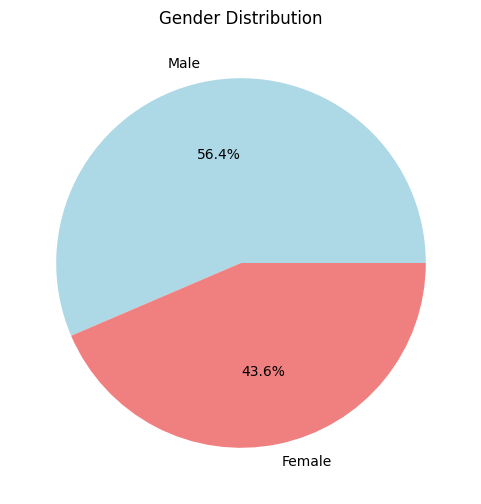

In [ ]:
# Count the occurrences of each gender
gender_counts = df['Gender'].value_counts()

# Plot
plt.figure(figsize=(6, 6))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', colors=['lightblue', 'lightcoral'])
plt.title('Gender Distribution')
plt.show()

Geography

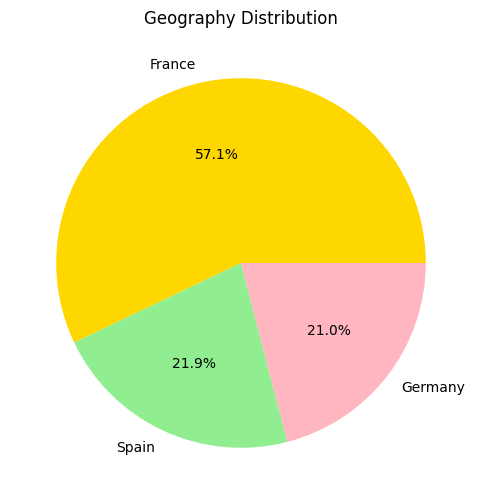

In [ ]:
# Count the occurrences of each country
geo_counts = df['Geography'].value_counts()

# Plot
plt.figure(figsize=(6, 6))
plt.pie(geo_counts, labels=geo_counts.index, autopct='%1.1f%%', colors=['gold', 'lightgreen', 'lightpink'])
plt.title('Geography Distribution')
plt.show()

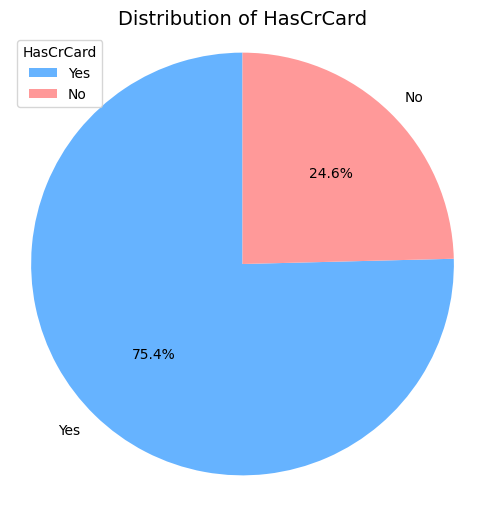

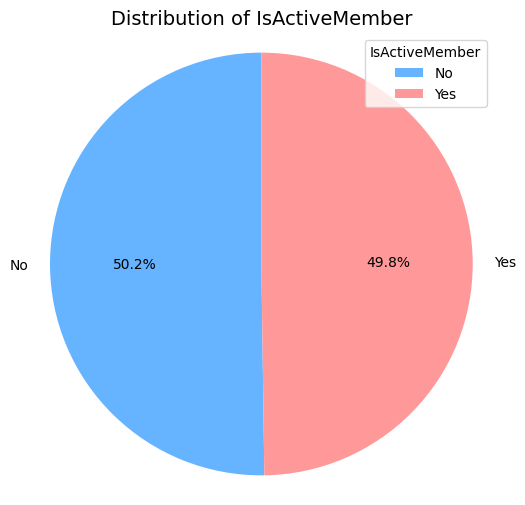

In [ ]:
import matplotlib.pyplot as plt

boolean_cols = ['HasCrCard', 'IsActiveMember']  # Assuming binary (1/0) columns

for col in boolean_cols:
    counts = df[col].value_counts()

    # Map 1 → "Yes", 0 → "No" (or other values if needed)
    labels = ['Yes' if idx == 1 else 'No' for idx in counts.index]

    plt.figure(figsize=(6, 6))
    plt.pie(
        counts.values,
        labels=labels,  # Use custom labels
        autopct='%1.1f%%',
        colors=['#66b3ff', '#ff9999'],  # Blue for "Yes", Red for "No"
        startangle=90
    )
    plt.title(f'Distribution of {col}', fontsize=14)
    plt.legend(labels, title=col, loc="best")  # Add legend for clarity
    plt.axis('equal')
    plt.show()

**Data Distribution Analysis**

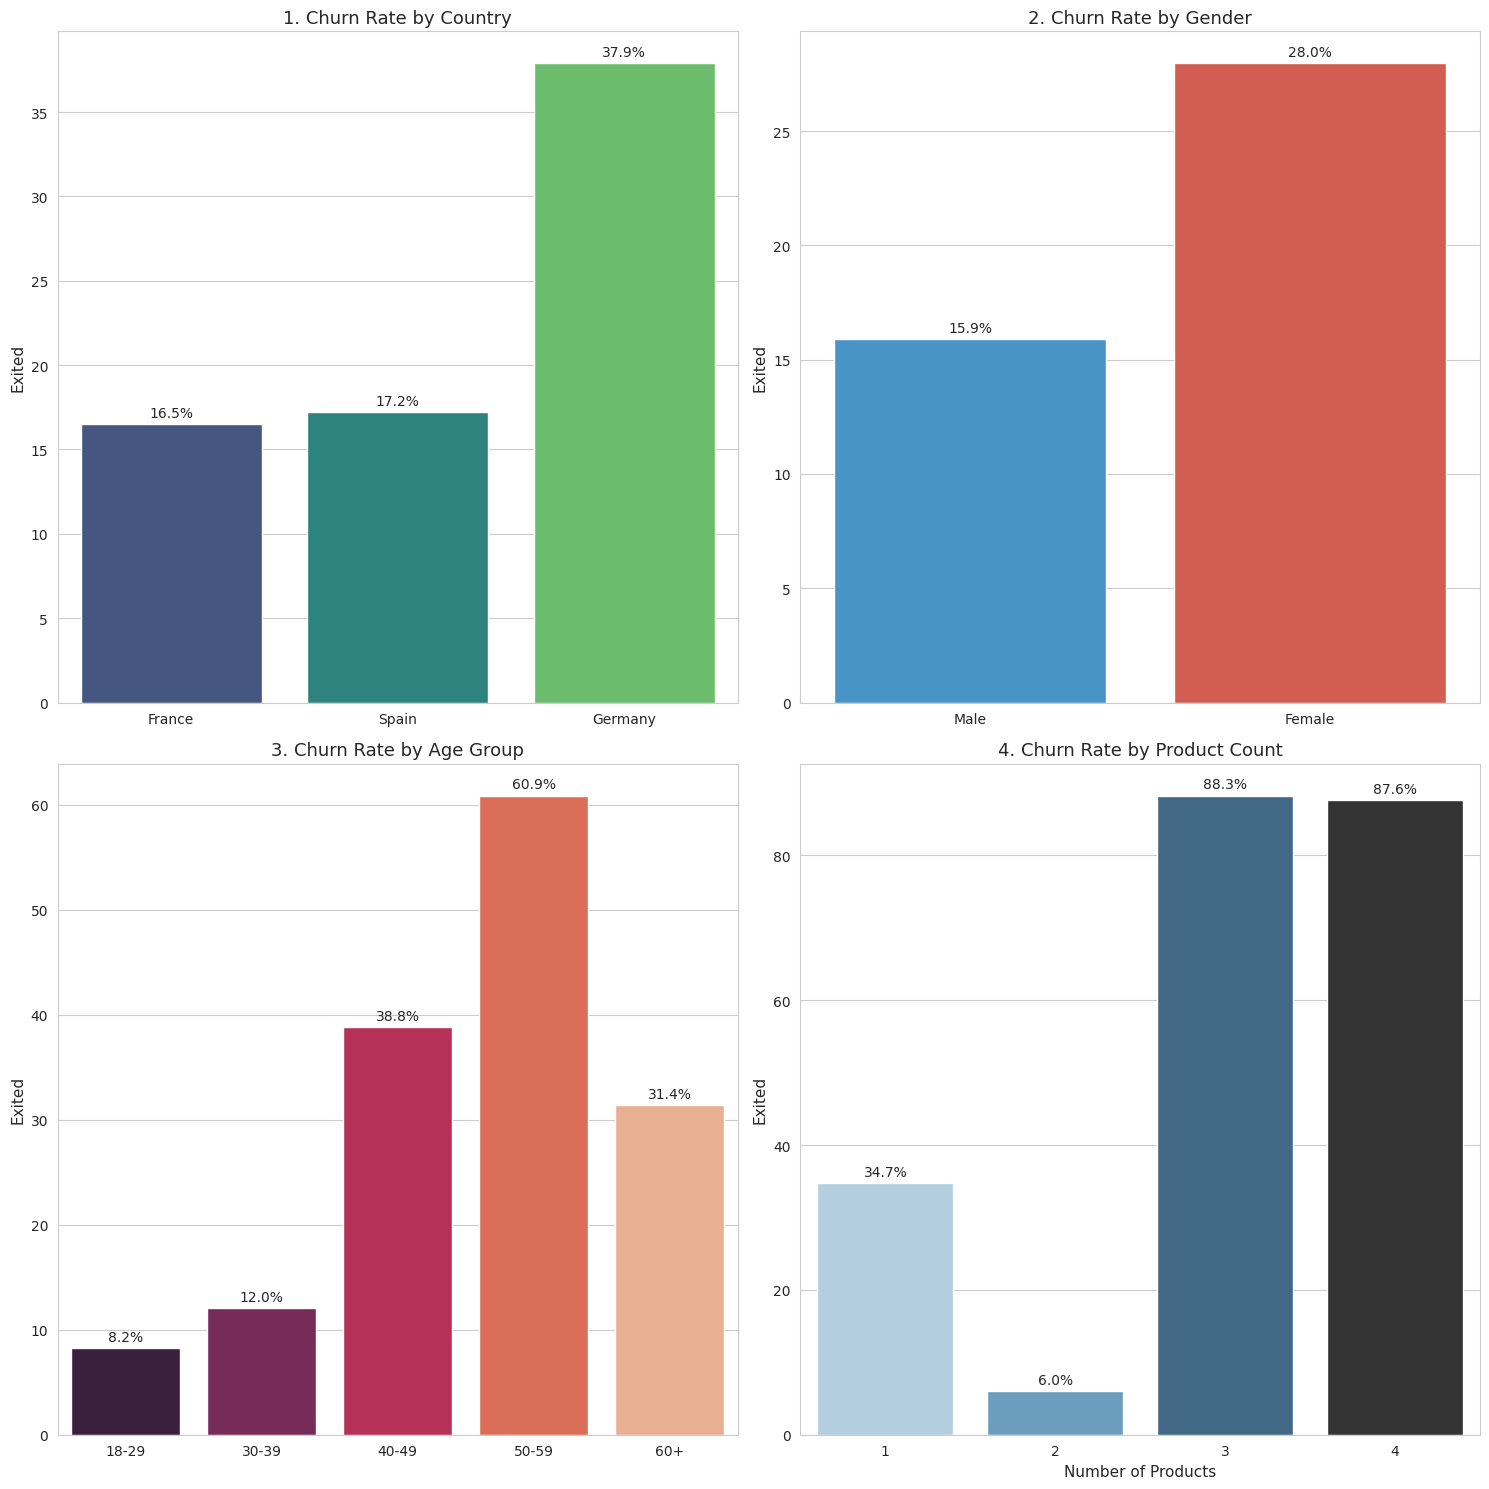

In [ ]:
df_plot = pd.DataFrame(df)  # Creates a new DataFrame (similar to shallow copy)
# Temporarily multiply 'Exited' by 100 for plotting
df_plot['Exited'] = df_plot['Exited'] * 100

# Set style
sns.set_style("whitegrid")
plt.rcParams['axes.titlesize'] = 13
plt.rcParams['axes.labelsize'] = 11

# Create figure
fig, axes = plt.subplots(2, 2, figsize=(15, 15))
plt.subplots_adjust(wspace=0.3, hspace=0.4)

# --- Chart 1: Geography ---
geo_plot = sns.barplot(
    x='Geography', y='Exited', hue='Geography',
    data=df_plot, palette='viridis', legend=False,
    ax=axes[0,0], order=['France', 'Spain', 'Germany'],
    errorbar=None
)
axes[0,0].set_title("1. Churn Rate by Country")
axes[0,0].set_xlabel("")
for container in geo_plot.containers:
    axes[0,0].bar_label(container, fmt='%.1f%%', padding=3)

# --- Chart 2: Gender ---
gender_plot = sns.barplot(
    x='Gender', y='Exited', hue='Gender',
    data=df_plot, palette=['#3498db', '#e74c3c'], legend=False,
    ax=axes[0,1],errorbar=None
)
axes[0,1].set_title("2. Churn Rate by Gender")
axes[0,1].set_xlabel("")
for container in gender_plot.containers:
    axes[0,1].bar_label(container, fmt='%.1f%%', padding=3)

# --- Chart 3: Age Groups ---
df_plot['AgeGroup'] = pd.cut(df_plot['Age'], bins=[18, 30, 40, 50, 60, 100],
                      labels=['18-29', '30-39', '40-49', '50-59', '60+'])
age_plot = sns.barplot(
    x='AgeGroup', y='Exited', hue='AgeGroup',
    data=df_plot, palette='rocket', legend=False,
    ax=axes[1,0],errorbar=None
)
axes[1,0].set_title("3. Churn Rate by Age Group")
axes[1,0].set_xlabel("")
for container in age_plot.containers:
    axes[1,0].bar_label(container, fmt='%.1f%%', padding=3)

# --- Chart 4: Products ---
product_plot = sns.barplot(
    x='NumOfProducts', y='Exited', hue='NumOfProducts',
    data=df_plot, palette='Blues_d', legend=False,
    ax=axes[1,1],errorbar=None
)
axes[1,1].set_title("4. Churn Rate by Product Count")
axes[1,1].set_xlabel("Number of Products")
for container in product_plot.containers:
    axes[1,1].bar_label(container, fmt='%.1f%%', padding=3)


# Adjust layout
plt.tight_layout()

# Save or show
plt.savefig('churn_dashboard_3x2.png', dpi=300, bbox_inches='tight')
plt.show()

/tmp/ipython-input-22-2132448984.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0,0].set_xticklabels(['Retained (0)', 'Churned (1)'])  # Match order of x='Exited' groups
/tmp/ipython-input-22-2132448984.py:25: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0,1].set_xticklabels(['Inactive', 'Active'])
/tmp/ipython-input-22-2132448984.py:36: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1,0].set_xticklabels(['Retained (0)', 'Churned (1)'])  # Match order of x='Exited' groups
/tmp/ipython-input-22-2132448984.py:49: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1,1].set_xticklabels(['Retained (0)', 'Churned (1)'])  # Match order of x='

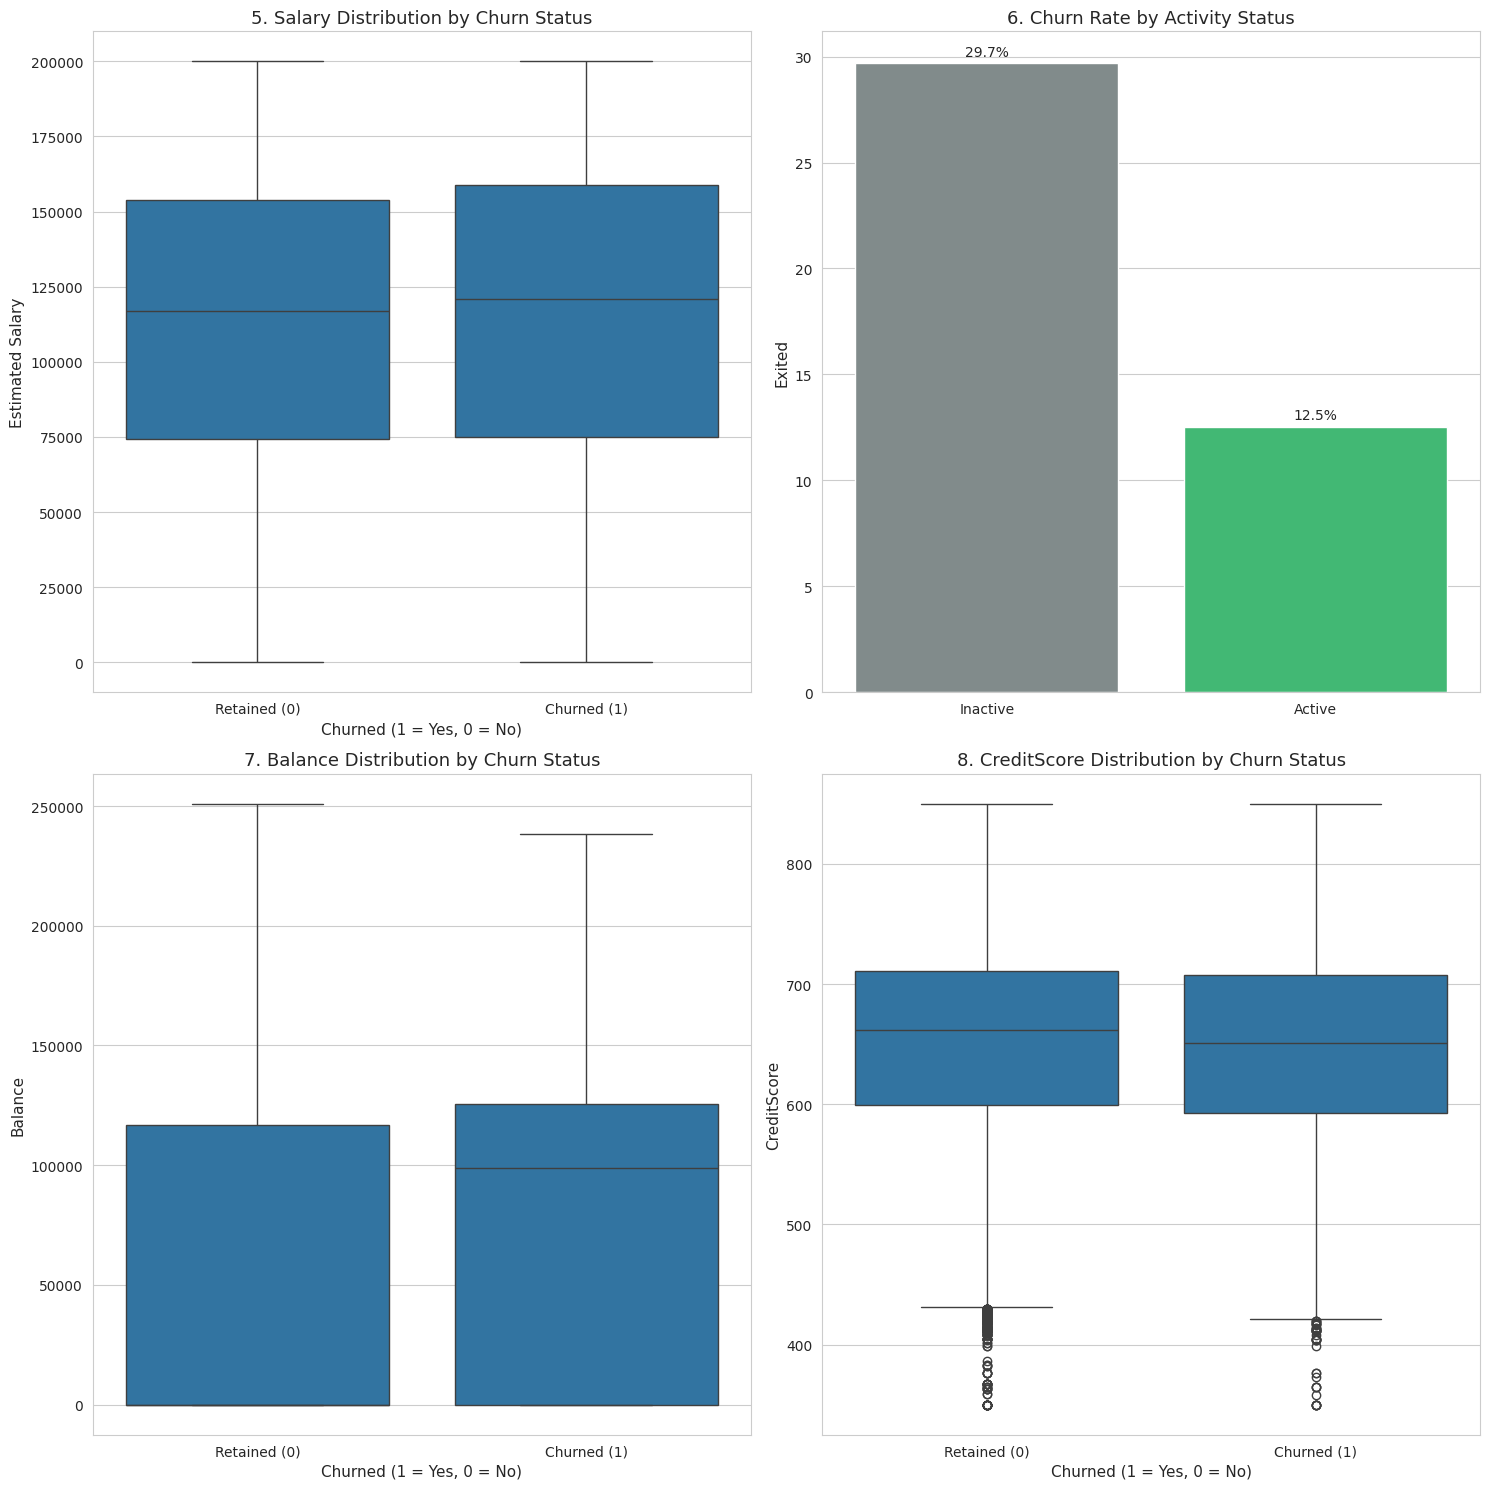

In [ ]:
# Create figure
fig, axes = plt.subplots(2, 2, figsize=(15, 15))
plt.subplots_adjust(wspace=0.3, hspace=0.4)

# --- Chart 5: Salary Ranges (Corrected) ---
# Option 1: Keep as boxplot (remove bar_label)
sns.boxplot(
    x='Exited', y='EstimatedSalary',
    data=df_plot,
    ax=axes[0,0])
# Set custom x-axis labels
axes[0,0].set_xticklabels(['Retained (0)', 'Churned (1)'])  # Match order of x='Exited' groups
axes[0,0].set_title("5. Salary Distribution by Churn Status")
axes[0,0].set_xlabel("Churned (1 = Yes, 0 = No)")
axes[0,0].set_ylabel("Estimated Salary")

# --- Chart 6: Activity Status ---
activity_plot = sns.barplot(
    x='IsActiveMember', y='Exited', hue='IsActiveMember',
    data=df_plot, palette=['#7f8c8d', '#2ecc71'], legend=False,
    ax=axes[0,1],errorbar=None
)
axes[0,1].set_title("6. Churn Rate by Activity Status")
axes[0,1].set_xlabel("")
axes[0,1].set_xticklabels(['Inactive', 'Active'])
for container in activity_plot.containers:
    axes[0,1].bar_label(container, fmt='%.1f%%', padding=3)

# --- Chart 7: Balance Ranges ---
# Option 1: Keep as boxplot
sns.boxplot(
    x='Exited', y='Balance',
    data=df_plot,
    ax=axes[1,0])
# Set custom x-axis labels
axes[1,0].set_xticklabels(['Retained (0)', 'Churned (1)'])  # Match order of x='Exited' groups
axes[1,0].set_title("7. Balance Distribution by Churn Status")
axes[1,0].set_xlabel("Churned (1 = Yes, 0 = No)")
axes[1,0].set_ylabel("Balance")



# --- Chart 8: CreditScore Ranges ---
sns.boxplot(
    x='Exited', y='CreditScore',
    data=df_plot,
    ax=axes[1,1])
# Set custom x-axis labels
axes[1,1].set_xticklabels(['Retained (0)', 'Churned (1)'])  # Match order of x='Exited' groups
axes[1,1].set_title("8. CreditScore Distribution by Churn Status")
axes[1,1].set_xlabel("Churned (1 = Yes, 0 = No)")
axes[1,1].set_ylabel("CreditScore")


# Adjust layout
plt.tight_layout()

# Save or show
plt.savefig('churn_dashboard_3x2.png', dpi=300, bbox_inches='tight')
plt.show()

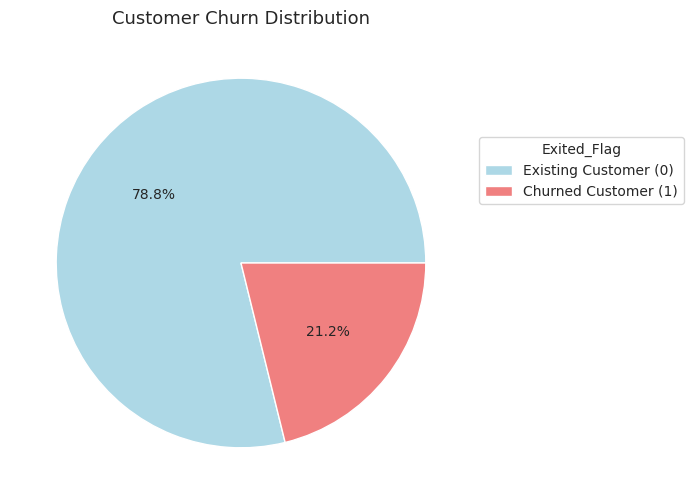

In [ ]:
# Customer Churn Distribution
exit_counts = df['Exited'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(exit_counts,
        labels=None,
        autopct='%1.1f%%',  # Remove percentages too
        colors=['lightblue', 'lightcoral']) # Style for percentages

plt.title('Customer Churn Distribution')
plt.legend( ['Existing Customer (0)', 'Churned Customer (1)'],title='Exited_Flag',loc='center left',bbox_to_anchor=(1, 0.7))
plt.show()


**Correlation Matrix**

- To understand relationship between features

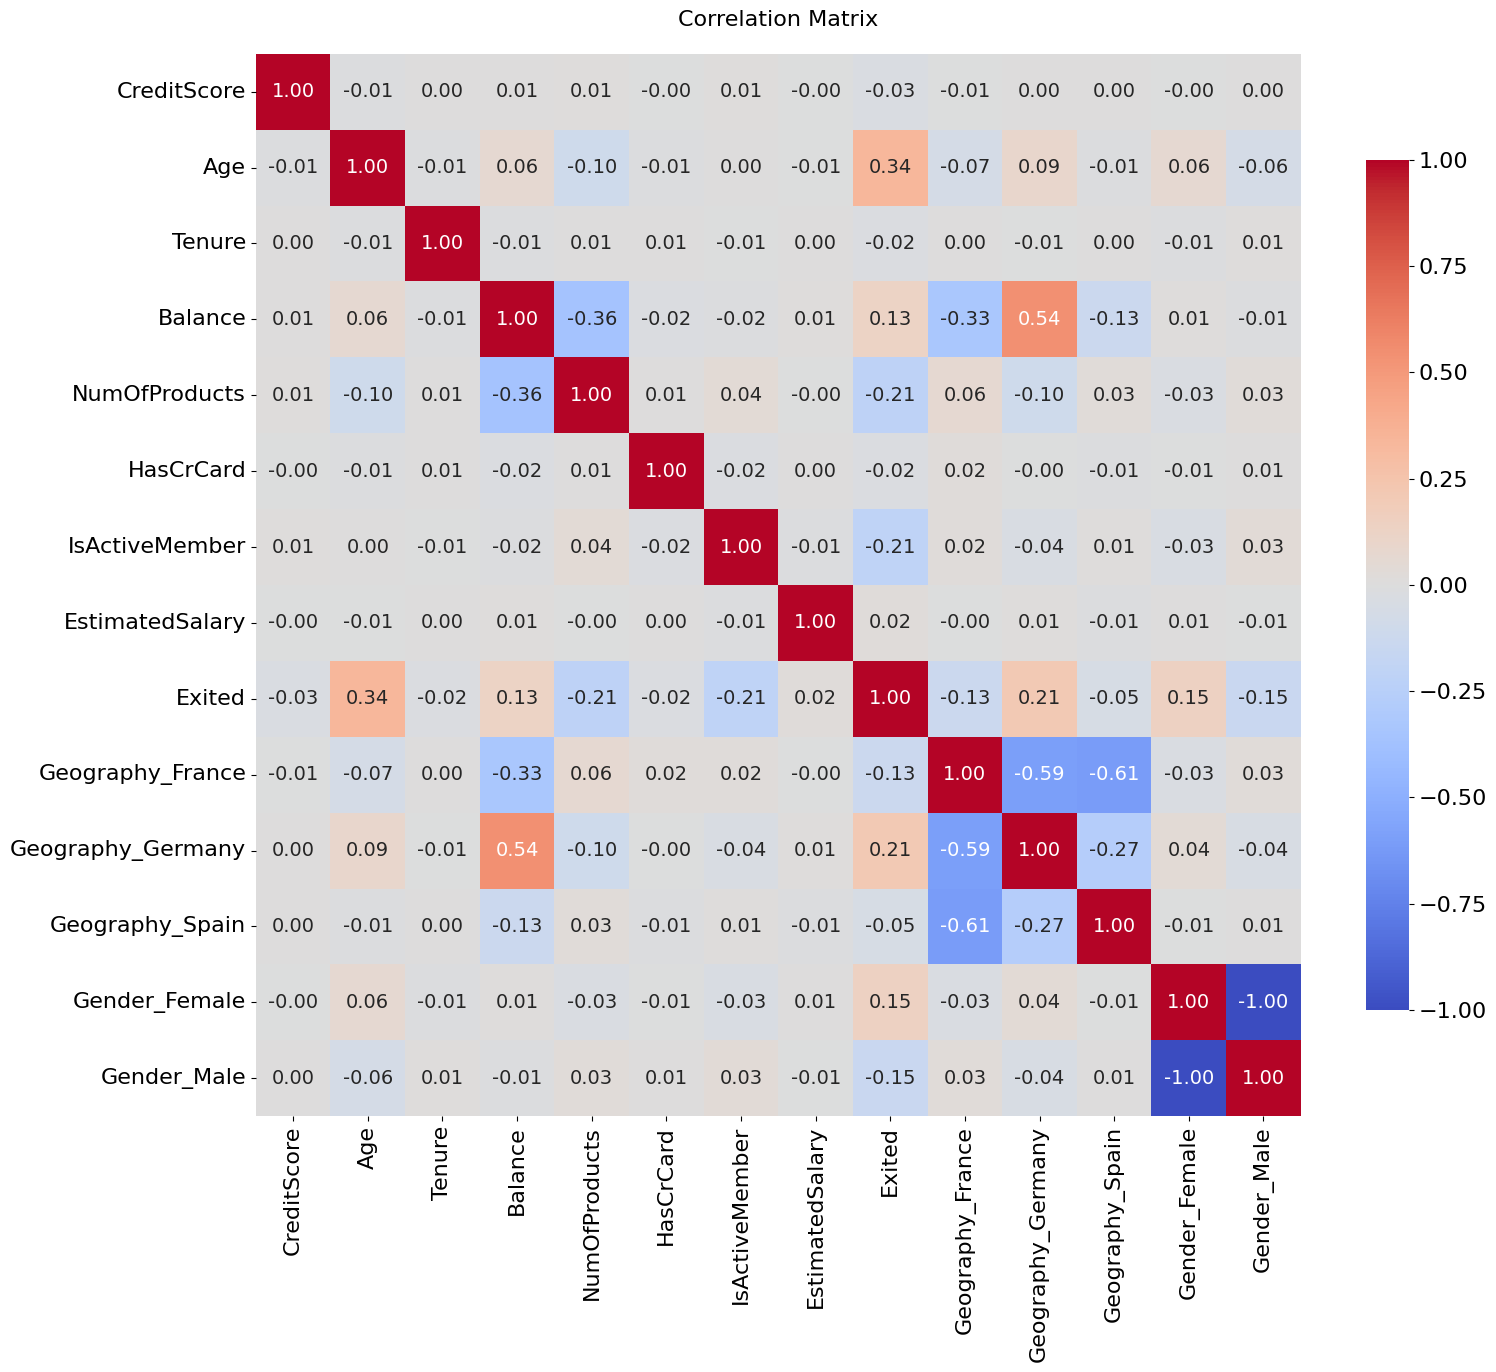

In [ ]:
# Set better font settings for readability
mpl.rcParams['font.size'] = 16
mpl.rcParams['axes.titlesize'] = 16
mpl.rcParams['axes.labelsize'] = 16

# Drop non-numeric columns that shouldn't be in correlation (ID and CustomerId)
df_numeric = df.drop(['id', 'CustomerId', 'Surname'], axis=1, errors='ignore')

# Convert categorical variables to numeric (one-hot encoding)
df_numeric = pd.get_dummies(df_numeric, columns=['Geography', 'Gender'])

# Calculate correlation matrix
corr_matrix = df_numeric.corr()

# Create a larger figure for better readability
plt.figure(figsize=(16, 14))

# Create heatmap with adjusted parameters
sns.heatmap(corr_matrix,
            annot=True,
            fmt=".2f",
            cmap='coolwarm',
            center=0,
            annot_kws={"size": 14},  # Adjust annotation font size
            cbar_kws={"shrink": 0.8})  # Adjust colorbar size

plt.title('Correlation Matrix', fontsize=16, pad=20)
plt.tight_layout()

# Save as high-quality PDF
plt.savefig('correlation_matrix.pdf',
            format='pdf',
            dpi=300,
            bbox_inches='tight')
plt.show()

**Customer Segmentation**



*   High-risk profile


/tmp/ipython-input-2468732911.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(
/tmp/ipython-input-2468732911.py:19: UserWarning: The palette list has more values (3) than needed (2), which may not be intended.
  ax = sns.barplot(


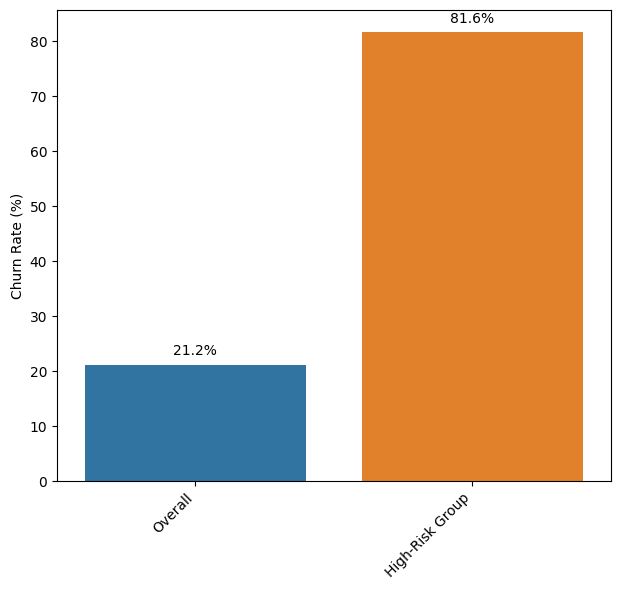


 High-Risk Group Definition:
- Age > 37.0 years
- Inactive members (IsActiveMember = 0)
- Single product holders
- Female customers in Germany

  Group Composition:
- Size: 4145 customers (2.5% of total)
- Average Age: 46.8 years
- Average Balance: €121,993.82
- Average Tenure: 4.9 years

  Churn Analysis:
- High-Risk Churn Rate: 81.6%
- Overall Churn Rate: 21.2%
- Risk Multiplier: 3.9x higher than average
- Accounts for 9.7% of all churns


In [ ]:
# Define the high-risk criteria
high_risk = df[
    (df['Age'] > df['Age'].median()) &
    (df['IsActiveMember'] == 0) &
    (df['NumOfProducts'] == 1) &
    (df['Geography'] == 'Germany') &
    (df['Gender'] == 'Female')
]

# Calculate comparison metrics
overall_churn = df['Exited'].mean() * 100
high_risk_churn = high_risk['Exited'].mean() * 100

# Create comparison visualization
plt.figure(figsize=(12, 6))

# 1. Main churn rate comparison
plt.subplot(1, 2, 1)
ax = sns.barplot(
    x=['Overall', 'High-Risk Group'],
    y=[overall_churn, high_risk_churn],
    palette=['#1f77b4', '#ff7f0e', '#d62728']
)
#plt.title('Churn Rate Comparison', pad=20)
plt.ylabel('Churn Rate (%)')
plt.xticks(rotation=45, ha='right')

# Add value labels
for p in ax.patches:
    ax.annotate(
        f'{p.get_height():.1f}%',
        (p.get_x() + p.get_width() / 2., p.get_height()),
        ha='center', va='center', xytext=(0, 10), textcoords='offset points'
    )


plt.tight_layout()
plt.show()

# Print key insights
print(f"\n High-Risk Group Definition:")
print(f"- Age > {df['Age'].median():.1f} years")
print(f"- Inactive members (IsActiveMember = 0)")
print(f"- Single product holders")
print(f"- Female customers in Germany\n")

print(f"  Group Composition:")
print(f"- Size: {len(high_risk)} customers ({len(high_risk)/len(df)*100:.1f}% of total)")
print(f"- Average Age: {high_risk['Age'].mean():.1f} years")
print(f"- Average Balance: €{high_risk['Balance'].mean():,.2f}")
print(f"- Average Tenure: {high_risk['Tenure'].mean():.1f} years\n")

print(f"  Churn Analysis:")
print(f"- High-Risk Churn Rate: {high_risk_churn:.1f}%")
print(f"- Overall Churn Rate: {overall_churn:.1f}%")
print(f"- Risk Multiplier: {high_risk_churn/overall_churn:.1f}x higher than average")
print(f"- Accounts for {len(high_risk[high_risk['Exited']==1])/len(df[df['Exited']==1])*100:.1f}% of all churns")

* Medium-risk profile

/tmp/ipython-input-3057645523.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(
/tmp/ipython-input-3057645523.py:17: UserWarning: The palette list has more values (3) than needed (2), which may not be intended.
  ax = sns.barplot(


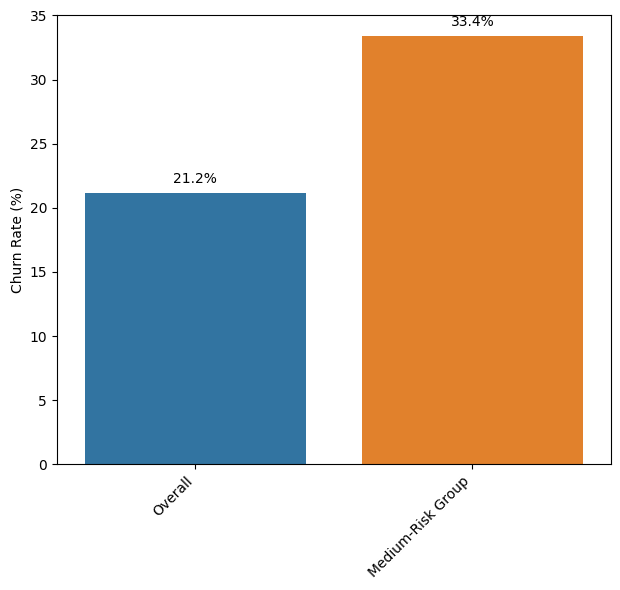


 Medium-Risk Group Definition:
- Age > 37.0 years
- Active members (IsActiveMember = 1)
- Single product holders
  Group Composition:
- Size: 17983 customers (10.9% of total)
- Average Age: 46.5 years
- Average Balance: €82,496.23
- Average Tenure: 4.9 years

  Churn Analysis:
- Medium-Risk Churn Rate: 33.4%
- Overall Churn Rate: 21.2%
- Risk Multiplier: 1.6x higher than average
- Accounts for 17.2% of all churns


In [ ]:
# Define the medium-risk criteria
medium_risk = df[
    (df['Age'] > df['Age'].median()) &
    (df['IsActiveMember'] == 1) &
    (df['NumOfProducts'] == 1)
]

# Calculate comparison metrics
overall_churn = df['Exited'].mean() * 100
medium_risk_churn = medium_risk['Exited'].mean() * 100

# Create comparison visualization
plt.figure(figsize=(12, 6))

# 1. Main churn rate comparison
plt.subplot(1, 2, 1)
ax = sns.barplot(
    x=['Overall', 'Medium-Risk Group'],
    y=[overall_churn, medium_risk_churn],
    palette=['#1f77b4', '#ff7f0e', '#d62728']
)
#plt.title('Churn Rate Comparison', pad=20)
plt.ylabel('Churn Rate (%)')
plt.xticks(rotation=45, ha='right')

# Add value labels
for p in ax.patches:
    ax.annotate(
        f'{p.get_height():.1f}%',
        (p.get_x() + p.get_width() / 2., p.get_height()),
        ha='center', va='center', xytext=(0, 10), textcoords='offset points'
    )


plt.tight_layout()
plt.show()

# Print key insights
print(f"\n Medium-Risk Group Definition:")
print(f"- Age > {df['Age'].median():.1f} years")
print(f"- Active members (IsActiveMember = 1)")
print(f"- Single product holders")

print(f"  Group Composition:")
print(f"- Size: {len(medium_risk)} customers ({len(medium_risk)/len(df)*100:.1f}% of total)")
print(f"- Average Age: {medium_risk['Age'].mean():.1f} years")
print(f"- Average Balance: €{medium_risk['Balance'].mean():,.2f}")
print(f"- Average Tenure: {medium_risk['Tenure'].mean():.1f} years\n")

print(f"  Churn Analysis:")
print(f"- Medium-Risk Churn Rate: {medium_risk_churn:.1f}%")
print(f"- Overall Churn Rate: {overall_churn:.1f}%")
print(f"- Risk Multiplier: {medium_risk_churn/overall_churn:.1f}x higher than average")
print(f"- Accounts for {len(medium_risk[medium_risk['Exited']==1])/len(df[df['Exited']==1])*100:.1f}% of all churns")

* Low-risk profile

/tmp/ipython-input-1934677710.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(
/tmp/ipython-input-1934677710.py:17: UserWarning: The palette list has more values (3) than needed (2), which may not be intended.
  ax = sns.barplot(


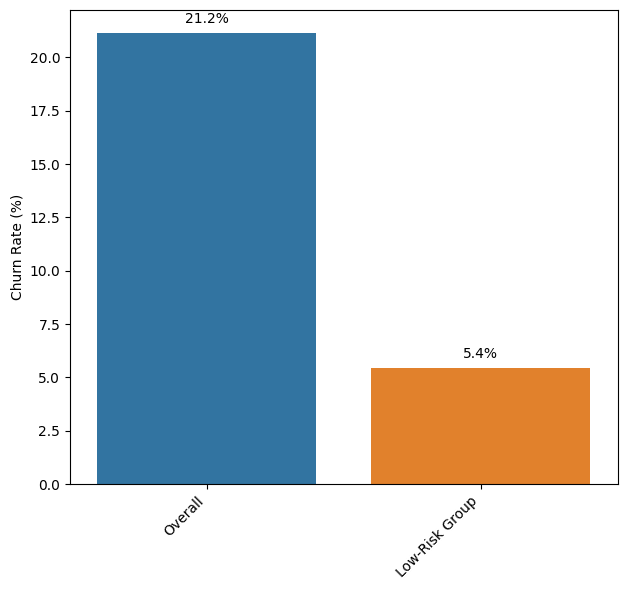


 Low-Risk Group Definition:
- Age < 37.0 years
- Active members (IsActiveMember = 1)
  Group Composition:
- Size: 40559 customers (24.6% of total)
- Average Age: 31.2 years
- Average Balance: €51,851.46
- Average Tenure: 5.0 years

  Churn Analysis:
- Low-Risk Churn Rate: 5.4%
- Overall Churn Rate: 21.2%
- Risk Multiplier: 0.3x higher than average
- Accounts for 6.3% of all churns


In [ ]:
# Define the low-risk criteria
low_risk = df[
    (df['Age'] < df['Age'].median()) &
    (df['IsActiveMember'] == 1)
]


# Calculate comparison metrics
overall_churn = df['Exited'].mean() * 100
low_risk_churn = low_risk['Exited'].mean() * 100

# Create comparison visualization
plt.figure(figsize=(12, 6))

# 1. Main churn rate comparison
plt.subplot(1, 2, 1)
ax = sns.barplot(
    x=['Overall', 'Low-Risk Group'],
    y=[overall_churn, low_risk_churn],
    palette=['#1f77b4', '#ff7f0e', '#d62728']
)
#plt.title('Churn Rate Comparison', pad=20)
plt.ylabel('Churn Rate (%)')
plt.xticks(rotation=45, ha='right')

# Add value labels
for p in ax.patches:
    ax.annotate(
        f'{p.get_height():.1f}%',
        (p.get_x() + p.get_width() / 2., p.get_height()),
        ha='center', va='center', xytext=(0, 10), textcoords='offset points'
    )


plt.tight_layout()
plt.show()

# Print key insights
print(f"\n Low-Risk Group Definition:")
print(f"- Age < {df['Age'].median():.1f} years")
print(f"- Active members (IsActiveMember = 1)")


print(f"  Group Composition:")
print(f"- Size: {len(low_risk)} customers ({len(low_risk)/len(df)*100:.1f}% of total)")
print(f"- Average Age: {low_risk['Age'].mean():.1f} years")
print(f"- Average Balance: €{low_risk['Balance'].mean():,.2f}")
print(f"- Average Tenure: {low_risk['Tenure'].mean():.1f} years\n")

print(f"  Churn Analysis:")
print(f"- Low-Risk Churn Rate: {low_risk_churn:.1f}%")
print(f"- Overall Churn Rate: {overall_churn:.1f}%")
print(f"- Risk Multiplier: {low_risk_churn/overall_churn:.1f}x higher than average")
print(f"- Accounts for {len(low_risk[low_risk['Exited']==1])/len(df[df['Exited']==1])*100:.1f}% of all churns")

**Model Performance F1-Score and AUC by Sampling Technique Plot**

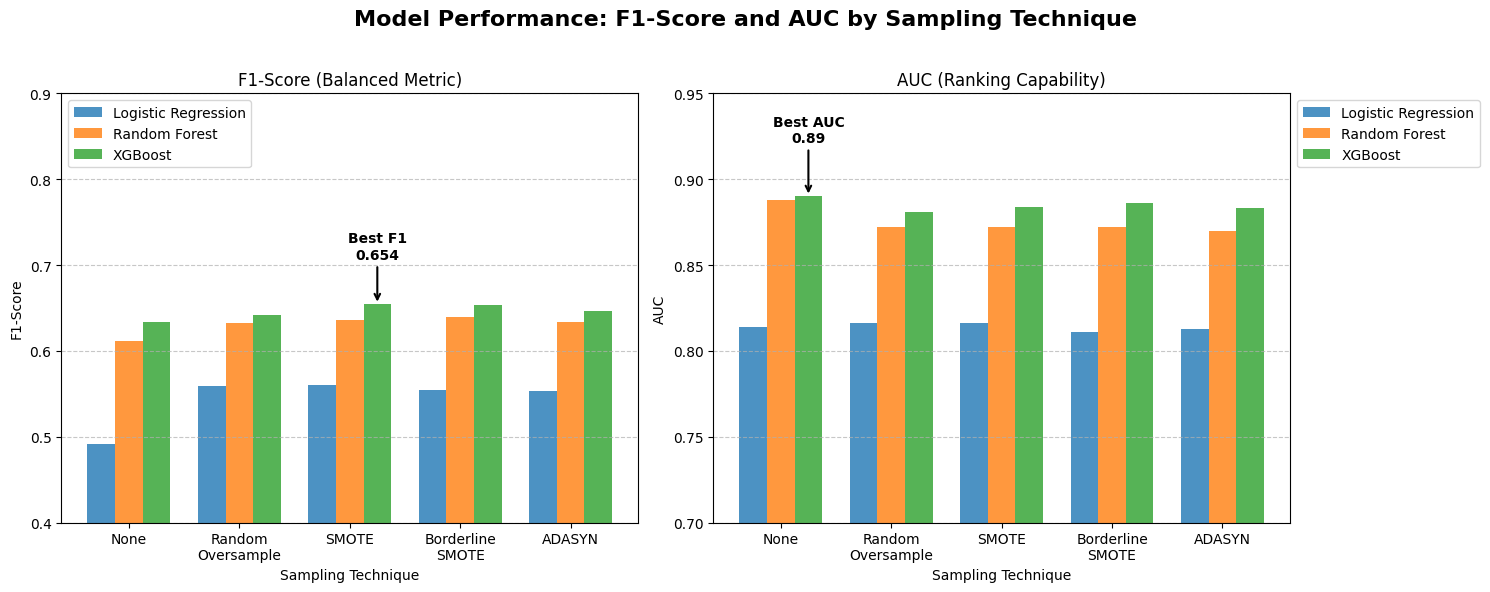

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Data for F1-Score
f1_data = {
    'Logistic Regression': [0.491, 0.559, 0.560, 0.554, 0.553],
    'Random Forest': [0.611, 0.632, 0.636, 0.640, 0.634],
    'XGBoost': [0.634, 0.642, 0.654, 0.653, 0.647]
}

# Data for AUC
auc_data = {
    'Logistic Regression': [0.814, 0.816, 0.816, 0.811, 0.813],
    'Random Forest': [0.888, 0.872, 0.872, 0.872, 0.870],
    'XGBoost': [0.890, 0.881, 0.884, 0.886, 0.883]
}

sampling_techniques = ['None', 'Random\nOversample', 'SMOTE', 'Borderline\nSMOTE', 'ADASYN']
x = np.arange(len(sampling_techniques))  # the label locations
width = 0.25  # the width of the bars
models = list(f1_data.keys())

# Create subplots: 1 row, 2 columns
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
fig.suptitle('Model Performance: F1-Score and AUC by Sampling Technique', fontsize=16, fontweight='bold')

# Plot F1-Scores
for i, model in enumerate(models):
    offset = width * i - width  # Centers the group of bars
    ax1.bar(x + offset, f1_data[model], width, label=model, alpha=0.8)

ax1.set_ylabel('F1-Score')
ax1.set_xlabel('Sampling Technique')
ax1.set_title('F1-Score (Balanced Metric)')
ax1.set_xticks(x)
ax1.set_xticklabels(sampling_techniques)
ax1.legend(loc='upper left', bbox_to_anchor=(0, 1))
ax1.set_ylim(0.4, 0.9)
ax1.grid(axis='y', linestyle='--', alpha=0.7)

# Add value labels for the highest F1 bar (XGBoost with SMOTE)
max_f1_index = 2  # SMOTE is the 3rd technique (index 2)
max_f1_value = f1_data['XGBoost'][max_f1_index]
ax1.annotate(f'Best F1\n{max_f1_value}',
             xy=(max_f1_index + width*1, max_f1_value),
             xytext=(max_f1_index+ width*1, max_f1_value + 0.05),
             ha='center', va='bottom',
             arrowprops=dict(arrowstyle='->', lw=1.5),
             fontweight='bold')

# Plot AUC Scores
for i, model in enumerate(models):
    offset = width * i - width  # Centers the group of bars
    ax2.bar(x + offset, auc_data[model], width, label=model, alpha=0.8)

ax2.set_ylabel('AUC')
ax2.set_xlabel('Sampling Technique')
ax2.set_title('AUC (Ranking Capability)')
ax2.set_xticks(x)
ax2.set_xticklabels(sampling_techniques)
ax2.legend(loc='upper left', bbox_to_anchor=(1, 1))
ax2.set_ylim(0.7, 0.95)
ax2.grid(axis='y', linestyle='--', alpha=0.7)

# Add value labels for the highest AUC bar (XGBoost without sampling)
max_auc_index = 0  # No sampling is the 1st technique (index 0)
max_auc_value = auc_data['XGBoost'][max_auc_index]
ax2.annotate(f'Best AUC\n{max_auc_value}',
             xy=(max_auc_index + width*1, max_auc_value),
             xytext=(max_auc_index+ width*1, max_auc_value + 0.03),
             ha='center', va='bottom',
             arrowprops=dict(arrowstyle='->', lw=1.5),
             fontweight='bold')

plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust layout to make room for the main title



# Save as high-quality PDF
plt.savefig('Model Performance F1-Score and AUC by Sampling Technique.pdf',
            format='pdf',
            dpi=600,
            bbox_inches='tight')

plt.show()